In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [21]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [22]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [23]:
print("Shape of traning data =",train.shape)
print("Shape of test data =",test.shape)

Shape of traning data = (1168, 81)
Shape of test data = (292, 80)


In [24]:
#Checking the duplicates in ID
print("Duplicates in train:",train.duplicated(subset='Id').sum())

print("Duplicates in test:",test.duplicated(subset='Id').sum())

Duplicates in train: 0
Duplicates in test: 0


In [25]:
train['type'] = 'train'
test['type'] = 'test'

In [26]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,type
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000,train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000,train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790,train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000,train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000,train


In [27]:
#Checking the info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [28]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


In [29]:
# checking for the number of unique values in each variable of the train data:

for col in train.columns:
    print("The number of values for", col, len(train[col].unique()))

The number of values for Id 1168
The number of values for MSSubClass 15
The number of values for MSZoning 5
The number of values for LotFrontage 107
The number of values for LotArea 892
The number of values for Street 2
The number of values for Alley 3
The number of values for LotShape 4
The number of values for LandContour 4
The number of values for Utilities 1
The number of values for LotConfig 5
The number of values for LandSlope 3
The number of values for Neighborhood 25
The number of values for Condition1 9
The number of values for Condition2 8
The number of values for BldgType 5
The number of values for HouseStyle 8
The number of values for OverallQual 10
The number of values for OverallCond 9
The number of values for YearBuilt 110
The number of values for YearRemodAdd 61
The number of values for RoofStyle 6
The number of values for RoofMatl 8
The number of values for Exterior1st 14
The number of values for Exterior2nd 15
The number of values for MasVnrType 5
The number of values

In [30]:
for col in test.columns:
    print("The number of values for",col, len(test[col].unique()))

The number of values for Id 292
The number of values for MSSubClass 15
The number of values for MSZoning 4
The number of values for LotFrontage 66
The number of values for LotArea 249
The number of values for Street 2
The number of values for Alley 3
The number of values for LotShape 4
The number of values for LandContour 4
The number of values for Utilities 2
The number of values for LotConfig 5
The number of values for LandSlope 3
The number of values for Neighborhood 24
The number of values for Condition1 8
The number of values for Condition2 2
The number of values for BldgType 5
The number of values for HouseStyle 8
The number of values for OverallQual 8
The number of values for OverallCond 7
The number of values for YearBuilt 84
The number of values for YearRemodAdd 57
The number of values for RoofStyle 5
The number of values for RoofMatl 3
The number of values for Exterior1st 12
The number of values for Exterior2nd 14
The number of values for MasVnrType 5
The number of values for

In [31]:
# Checking number of types of data in both dataset:
print('Train Dataset:\n',train.dtypes.value_counts())
print('\t')
print('Test Dataset:\n',test.dtypes.value_counts())

Train Dataset:
 object     44
int64      35
float64     3
dtype: int64
	
Test Dataset:
 object     43
int64      34
float64     4
dtype: int64


After this inspection of the datasets, we saw that there are a total of 1168 training examples and 292 test examples. In the train dataset the total number of attributes/features are 81, which includes ID and SalePrice. And in test dataset we have 80 attributes/features which doesn't contain the variable 'SalePrice', and that's our target variable.

In [32]:
#Saving the Id column and seggregating them as per dataset
train_ID = train['Id']
test_ID = test['Id']
#Dropping the Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [33]:
# Concatenating both datasets:

concat = [train,test]

# Dropping the index of the DataFrame and replaces it with an index of increasing integers:

all_data = pd.concat(concat).reset_index(drop=True)  
                                                    
# Deleting SalePrice from all_data:

all_data.drop(['SalePrice'], axis=1, inplace=True)

In [34]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,type
0,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,train
1,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,train
2,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,train
3,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,train
4,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,test
1456,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,test
1457,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,test
1458,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,test


# MISSING VALUES

LET'S DELETE THOSE COLUMN WHICH IS NOT THAT USEFULL

In [35]:
# Let's drop all those which are not useful variables:
all_data = all_data.drop(['Utilities',"type", 'Street', 'PoolQC',"PoolArea"], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (1460, 75)


<AxesSubplot:>

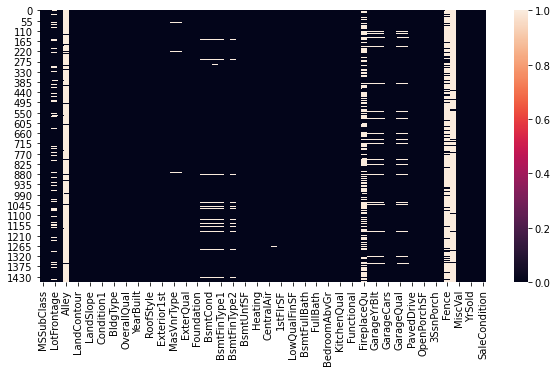

In [36]:
# visualizing missing values:

plt.figure(figsize=(10,5))
sns.heatmap(all_data.isna())

In [37]:
print('Categorical Columns that content Null values')
category = all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)
category[category > 0]

Categorical Columns that content Null values


MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [26]:
categorical_miss_val = round(100*(all_data.select_dtypes(include=object).isna().sum().\
sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:10]
categorical_miss_val

,Null values percentage
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
GarageCond,5.55
GarageQual,5.55
GarageFinish,5.55
GarageType,5.55
BsmtFinType2,2.60
BsmtExposure,2.60


In [38]:
# 'MiscFeature', 'Alley', 'Fence' for all of these featurs most of their 90% data is missing, so we can drop it:

all_data = all_data.drop(['MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (1460, 71)


In [39]:
#Filling all the categorical column with None which have NaN values

all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')
all_data['Electrical'] = all_data['Electrical'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['MSZoning'] = all_data['MSZoning'].fillna('None')
all_data['Functional'] = all_data['Functional'].fillna('None')
all_data['SaleType'] = all_data['SaleType'].fillna('None')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('None')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('None')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('None')

In [40]:
# Checking the numerical columns that content Null values:

print('Numerical Columns that content Null values')
Columns = all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)
Columns[Columns > 0]

Numerical Columns that content Null values


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [41]:
# Let's check for the percentage of these numerical variables that content Null values:

numerical_miss_val = round(100*(all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:5]
numerical_miss_val

,Null values percentage
LotFrontage,17.74
GarageYrBlt,5.55
MasVnrArea,0.55
GarageArea,0.00
BedroomAbvGr,0.00


We can see that the maximum null value Percentage that is of LotFrontage is not even 18%. So dropping any of them will not be a good option. Hence we are going to replace the null values.

In [43]:
# Grouping by neighborhood and filling the NaN value with median LotFrontage of all the neighborhood:

all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].median())

In [44]:
# Replacing all the Nan values in GarageYrBlt with median
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].median())
# Replacing all the Nan values in MasVnrArea with median
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].median())

In [45]:
#Checking for NULL values now
sum(all_data.select_dtypes(include=object).isna().sum() != 0)

0

<AxesSubplot:>

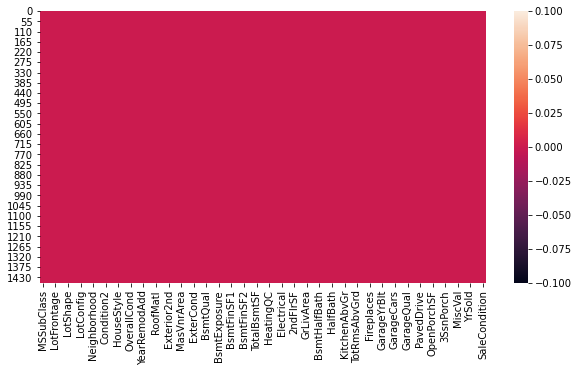

In [46]:
plt.figure(figsize=(10, 5))
sns.heatmap(all_data.isna())

# Analysis of Target Variable

Text(0, 0.5, 'Frequency')

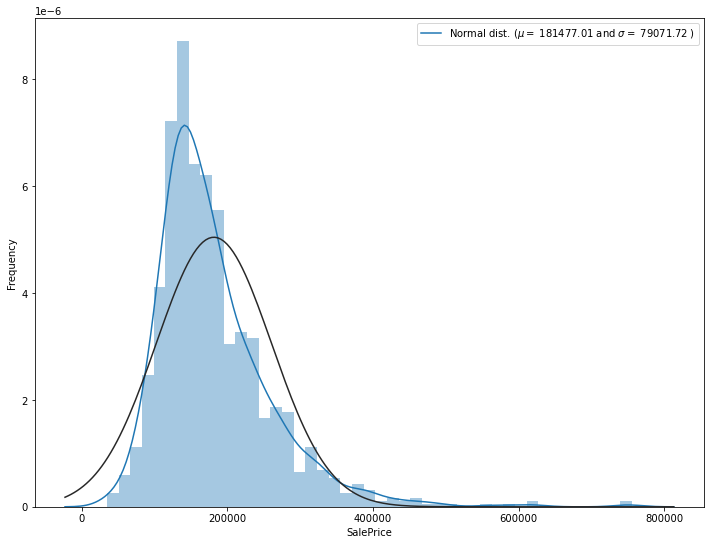

In [47]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plotting with the distribution:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')


We can see that our taret variable is not normalised and is positively skewed.

In [49]:
# Analysing  skewness to check the normality of the variable:


skew = train['SalePrice'].skew()

print('Sale Price Skewness {}'.format(skew))

Sale Price Skewness 1.953877705368286


We will try to normalise the column using log.

Text(0, 0.5, 'Frequency')

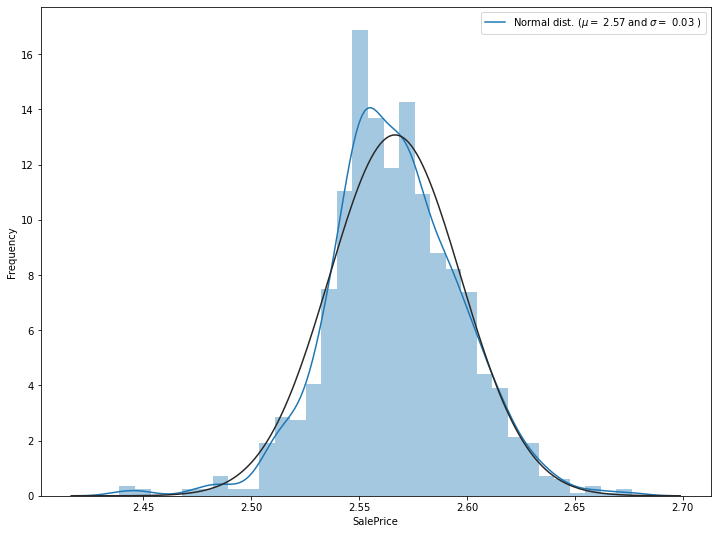

In [51]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# Let's check the normality now

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plotting with the distribution now:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')


In [52]:
# Correlation between columns and target column:

corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame().\
style.background_gradient(axis=1,cmap=sns.light_palette('yellow', as_cmap=True))

,SalePrice
OverallQual,0.816351
GrLivArea,0.693082
GarageCars,0.671233
GarageArea,0.645829
FullBath,0.592575
TotalBsmtSF,0.589604
YearBuilt,0.576723
1stFlrSF,0.574166
YearRemodAdd,0.571524
TotRmsAbvGrd,0.529668


In [53]:
# Separating variable into new dataframe from original dataframe which has only numerical values
# There is 38 numerical attribute from 81 attributes:

train_corre = train.select_dtypes(include=[np.number])
train_corre.shape

(1168, 37)

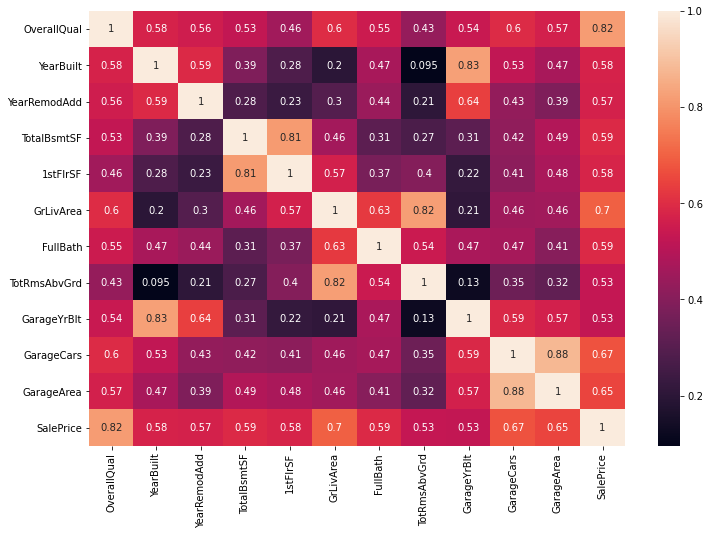

In [44]:
# Checking now for correlation higher than 0.5:

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [58]:
# let's separeting the categorical variables into ordinals and nominals:

# Ordinals:

categorical_ordinal = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 
                     'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
                     'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
                     'GarageCond','PavedDrive']

In [62]:
# Nominals:

categorical_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir',
                     'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st',
                     'Exterior2nd', 'Heating', 'Foundation']

In [63]:
#From sklearn importing LabelEncoder library to encode the ordinal variables:

from sklearn.preprocessing import LabelEncoder
for col in categorical_ordinal:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [64]:
# Get k-1 dummies in nominal variables to avoid multicollinearity:

nominal_one_hot = pd.get_dummies(all_data[categorical_nominal], drop_first= True).reset_index(drop=True)

# checking it:

print(f'Shape of nominal_one_hot: {nominal_one_hot.shape}')
nominal_one_hot.head()

Shape of nominal_one_hot: (1460, 114)


,MSSubClass,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,120,2,2007,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,20,10,2007,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,60,6,2007,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,20,1,2010,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,20,6,2009,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [65]:
# Now lets concatenate the one Hot Encoded categorcal nominal features with main data frame.

# First we need to drop the catgorical nominal columns from all_data:

all_data = all_data.drop(categorical_nominal, axis= 'columns')

# Now lets concat it:

all_data = pd.concat([all_data, nominal_one_hot], axis='columns')

# Checking shape now:

print(f'Shape of all_data: {all_data.shape}')


all_data.head()

Shape of all_data: (1460, 168)


,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,24.0,4928,0,3,4,0,4,6,5,1976,...,1,0,0,0,0,1,0,0,0,0
1,95.0,15865,0,3,4,1,0,8,6,1970,...,1,0,0,0,0,0,1,0,0,0
2,92.0,9920,0,3,1,0,0,7,5,1996,...,1,0,0,0,0,0,1,0,0,0
3,105.0,11751,0,3,4,0,0,6,6,1977,...,1,0,0,0,0,1,0,0,0,0
4,80.0,16635,0,3,2,0,0,6,7,1977,...,1,0,0,0,0,1,0,0,0,0


# Seperating the training and testing data

In [66]:
# Let's separate data:

train_data = pd.DataFrame(all_data[:1168])
test_data = pd.DataFrame(all_data[1168:])

In [67]:
train_data.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,YearBuilt,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,24.0,4928,0,3,4,0,4,6,5,1976,...,1,0,0,0,0,1,0,0,0,0
1,95.0,15865,0,3,4,1,0,8,6,1970,...,1,0,0,0,0,0,1,0,0,0
2,92.0,9920,0,3,1,0,0,7,5,1996,...,1,0,0,0,0,0,1,0,0,0
3,105.0,11751,0,3,4,0,0,6,6,1977,...,1,0,0,0,0,1,0,0,0,0
4,80.0,16635,0,3,2,0,0,6,7,1977,...,1,0,0,0,0,1,0,0,0,0


In [104]:
# Taking values X and y:

x = train_data
y = train['SalePrice']

In [105]:
# Checking:

print(f'Training set sizes: {X_train.shape}, {y_train.shape}')
print(f'Validation set sizes: {X_test.shape}, {y_test.shape}')

Training set sizes: (876, 168), (934,)
Validation set sizes: (292, 168), (234,)


In [106]:
#removing the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))

In [108]:
#scaling the values
from sklearn.preprocessing import MinMaxScaler
sl=MinMaxScaler()
x=pd.DataFrame(sl.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.028217,0.256316,0.0,1.0,1.000000,0.0,1.00000,0.596935,0.613289,0.607531,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.427578,0.492699,0.0,1.0,1.000000,1.0,0.00000,0.803551,0.722066,0.551199,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.415564,0.396442,0.0,1.0,0.103558,0.0,0.00000,0.701700,0.613289,0.822032,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.466038,0.430958,0.0,1.0,1.000000,0.0,0.00000,0.596935,0.722066,0.617258,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.364970,0.502514,0.0,1.0,0.298574,0.0,0.00000,0.596935,0.821667,0.617258,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.323921,0.394364,0.0,1.0,1.000000,0.0,0.00000,0.488735,0.613289,0.524295,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1164,0.304664,0.371640,1.0,1.0,1.000000,0.0,0.00000,0.376379,0.613289,0.379090,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1165,0.028217,0.106397,1.0,1.0,0.298574,0.0,0.99884,0.596935,0.722066,0.607531,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1166,0.213953,0.365163,1.0,1.0,1.000000,0.0,0.00000,0.376379,0.492711,0.195015,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building the Model

In [107]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [116]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [117]:
model_select(LinearRegression)

Max score is 0.9028975929321358 with random state 99


In [118]:
model_select(KNeighborsRegressor)

Max score is 0.7806067094675789 with random state 80


In [119]:
model_select(DecisionTreeRegressor)

Max score is 0.7607178371717391 with random state 59


In [120]:
model_select(SVR)

Max score is 0.21953506367601117 with random state 62


In [121]:
model_select(Ridge)

Max score is 0.9332277822261507 with random state 48


In [122]:
model_select(RandomForestRegressor)

Max score is 0.8975562980456585 with random state 72


In [124]:
model_select(AdaBoostRegressor)

Max score is 0.8412484433224192 with random state 85


In [126]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=86)
print(x_train.shape, x_test.shape)

(782, 168) (386, 168)


In [139]:
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()


0.8366537197431226

In [140]:
cross_val_score(Ridge(),x_train,y_train,cv=5).mean()


0.8764321848584897

In [141]:
cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()


-6.311880562994018e+22

In [142]:
#we can see that linear regression is ver fitted so i have used regularization technique called ridge which gave 87% and random forest 83% r2 score

In [151]:
#Hyperparameter tuning
rf= Ridge()

parameters = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500],

"solver":["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(r2_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


Ridge(alpha=200, solver='sag')

In [152]:
rd=grid_cv.best_estimator_

In [153]:
rd.fit(x_train,y_train)
print(rd.score(x_train, y_train))

0.7351953520465553


In [155]:
rf= RandomForestRegressor()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(r2_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=3,
                      n_estimators=15)

In [156]:
rf=grid_cv.best_estimator_

In [158]:
rf.fit(x_train,y_train)
print(rf.score(x_train, y_train))

0.9283134519485393


In [159]:
predict=rf.predict(x_test)

pd.Series(predict)

0      2.582037
1      2.587726
2      2.554956
3      2.581690
4      2.542483
         ...   
381    2.555342
382    2.546914
383    2.568545
384    2.541791
385    2.562309
Length: 386, dtype: float64

In [160]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 0.8464923204824277
Mean absolute error is 0.008391389590576588
Mean squared error is 0.00013955532419435756


Text(0, 0.5, 'Predicted Y')

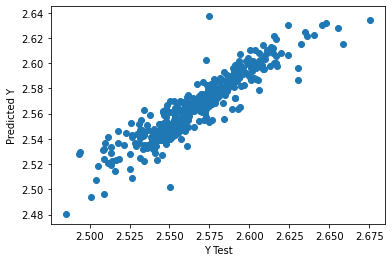

In [161]:
# Plotting the actual y and predicted y
plt.scatter(x=y_test,y=predict)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

 From the above all the models, the best model is Gradient_boosting Regression

In [163]:
# Lets save the model having highest accuracy using joblib 
import joblib
joblib.dump(rf,'gbr_housing.pkl')

['gbr_housing.pkl']